In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import interactive
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from math import exp
import matplotlib.ticker as ticker

In [2]:
AVD_data = pd.read_csv('raw_data/Adventdalen_Hour.dat', 
	skiprows = [0,2,3],index_col = 0,parse_dates = True, na_values = 'NAN', header = 0 ,
	names = ['TIMESTAMP','RECORD','ID','T2m_PT1000_Max','T2m_PT1000_Min','T2m_PT1000_Avg',
	'T10m_PT1000_Max','T10m_PT1000_Min','T10m_PT1000_Avg',
	'T2m_Rotron_Max','T2m_Rotron_Min','T2m_Rotron_Avg',
	'LF2m_Rotron_Max','LF2m_Rotron_Avg','T10m_Rotron_Max',
	'T10m_Rotron_Min', 'T10m_Rotron_Avg', 'LF10m_Rotron_Max',
	'LF10m_Rotron_Avg','p_mbar','ff2m_mps_Max','ff2m_10min',
	'ff2m_mps_avg', 'dd2m', 'ff10m_sek_Max', 'ff10m_10min',
	'ff10m_mps_Avg','dd10m','Batt_V_Min'])

# Import data from radiation measurements Adventdalen 
AVD_rad_all = pd.read_csv('raw_data/Adventdalen_New_Fem_minutt.dat', 
	skiprows = [0,2,3],index_col = 0, parse_dates = True, na_values = 'NAN',header = 0,
	names = ['TIMESTAMP','RECORD','SWin_Wpm2','LWin_Wpm2','SWout_Wpm2','LWout_Wpm2','CNR1_temp_gr_C_Avg'])

# Radiaton data is available in 5min steps, create hourly mean values of the radiation components. 
# shift(1) - shift the whole dataset by one timestep so that a value at each timestep is the mean of the previous hour
AVD_rad_data = pd.DataFrame.from_dict({
	'SWin_Wpm2':AVD_rad_all['SWin_Wpm2'].resample('H').mean().shift(1), #opp..upward looking instrument measuring SW down
	'SWout_Wpm2': AVD_rad_all['SWout_Wpm2'].resample('H').mean().shift(1), #ned..downward looking instrument measuring SW up
	'LWin_Wpm2': AVD_rad_all['LWin_Wpm2'].resample('H').mean().shift(1),
	'LWout_Wpm2': AVD_rad_all['LWout_Wpm2'].resample('H').mean().shift(1)})
# Import data from AWS Gruvefjellet (GF)
GF_data = pd.read_csv('raw_data/Gruvefjellet_Res_data.dat', 
	skiprows = [0,2,3], index_col = 0,parse_dates = True, na_values = 'NAN', header = 0 ,
	names = ['TIMESTAMP','RECORD','ID','T10cm_minutt_Max','T10cm_minutt_Min','T10cm_minutt_Avg',
	'T1m_minutt_Max','T1m_minutt_Min','T1m_minutt_Avg',
	'T3m_minutt_Max','T3m_minutt_Min','T3m_minutt_Avg',
	'LF_minutt_Max','LF_minutt_Avg','p_mbar','ff_mps_Max','ff_10min',
	'ff_mps_avg', 'dd','NB_time','SD_m','SD_kval','TSS','T_soil_1m',
	'T_soil_2m','T_soil_3m','T_soil_4m','T_soil_5m','T_soil_6m',
	'R_surf_ohm','R_1m_ohm', 'R_2m_ohm', 'R_3m_ohm', 'R_4m_ohm',
	'R_5m_ohm', 'R_6m_ohm', 'Batt_V_Min'])

# Import ERA5 precipitation data
ERA5_all = pd.read_csv('data/ERA5_GF.txt', index_col = 0, parse_dates = True,
	na_values = 'NaN', header = 0, names = ['TIMESTAMP', 'HS', 'RR', 'RRmm',
	'T2m', 'ptype'])
# eklima precipitation data
eklima_LFH_RR_all = pd.read_csv('data/LFH_RR_ts.txt', index_col=0,parse_dates = True,
na_values='NaN',header=0, names= ['RR','ff'])
eklima_AVD_RR_all = pd.read_csv('data/AVD_RR_ts.txt', index_col=0,parse_dates = True,
na_values='NaN',header=0, names= ['RR','ff'])
eklima_LFH_T_all = pd.read_csv('data/LFH_T_ts.txt', index_col=0,parse_dates = True,
na_values='NaN',header=0, names= ['T'])
eklima_AVD_T_all = pd.read_csv('data/AVD_T_ts.txt', index_col=0,parse_dates = True,
na_values='NaN',header=0, names= ['T'])


In [3]:
GF_data = GF_data['2016-08-01 00:00:00':'2017-04-30 23:00:00']			 	
AVD_rad_data = AVD_rad_data['2016-08-01 00:00:00':'2017-04-30 23:00:00'] 
AVD_data = AVD_data['2016-08-01 00:00:00':'2017-04-30 23:00:00']
eklima_LFH_RR = eklima_LFH_RR_all['2016-08-01 06:00:00':'2017-04-30 23:00:00']
eklima_AVD_RR = eklima_AVD_RR_all['2016-08-01 06:00:00':'2017-04-30 23:00:00']
eklima_LFH_T = eklima_LFH_T_all['2016-08-01 00:00:00':'2017-04-30 23:00:00']
eklima_AVD_T = eklima_AVD_T_all['2016-08-01 00:00:00':'2017-04-30 23:00:00']
ERA5 = ERA5_all['2016-08-01 06:00:00':'2017-04-30 23:00:00']

284.3
503.8799999999999
569.4300000000006


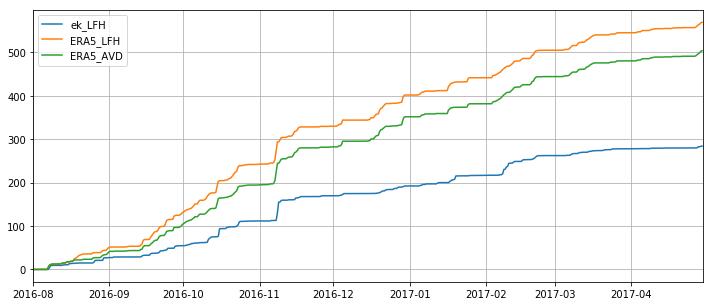

In [4]:
# firstofmonth = mdates.DayLocator(bymonthday=1)

ek_LFH = pd.read_csv('data/LFH_RR_ts.txt', na_values = 'NaN')
ek_LFH.DateTime = pd.to_datetime(ek_LFH.DateTime)
ek_LFH.set_index('DateTime',inplace=True)

ek_AVD = pd.read_csv('data/AVD_RR_ts.txt', na_values = 'NaN')
ek_AVD.DateTime = pd.to_datetime(ek_AVD.DateTime)
ek_AVD.set_index('DateTime',inplace=True)

ERA5_RR1h_LFH = pd.read_csv('data/ERA5_GF.txt', na_values = 'NaN')
ERA5_RR1h_LFH['DateTime'] = pd.to_datetime(ERA5_RR1h_LFH['DateTime'])
ERA5_RR1h_LFH.set_index('DateTime',inplace=True)

ERA5_RR1h_AVD = pd.read_csv('data/ERA5_AVD.txt', na_values = 'NaN')
ERA5_RR1h_AVD['DateTime'] = pd.to_datetime(ERA5_RR1h_AVD['DateTime'])
ERA5_RR1h_AVD.set_index('DateTime',inplace=True)


ERA5_RR12h_LFH = ERA5_RR1h_LFH.RRmm.resample('12H', base = 6).sum()
ERA5_RR12h_LFH = ERA5_RR12h_LFH['2016-08-01 00:00:00':'2017-04-30 0:00:00']

ERA5_RR12h_AVD = ERA5_RR1h_AVD.RRmm.resample('12H', base = 6).sum()
ERA5_RR12h_AVD = ERA5_RR12h_AVD['2016-08-01 00:00:00':'2017-04-30 00:00:00']
ek_LFH = ek_LFH['2016-08-01 00:00:00':'2017-04-30 00:00:00']
ek_AVD = ek_AVD['2016-08-01 00:00:00':'2017-04-30 00:00:00']

print(np.nansum(ek_LFH['RR']))
print(sum(ERA5_RR12h_AVD))
print(sum(ERA5_RR12h_LFH))


precip = pd.DataFrame()
precip['ERA5_12H_LFH'] = ERA5_RR12h_LFH
precip['ERA5_12H_AVD'] = ERA5_RR12h_AVD
precip['ek_LFH'] = ek_LFH.RR
precip['ek_AVD'] = ek_AVD.RR

# print(precip.index)

plt.figure(figsize = (12,5))
ns_ek_LFH = precip['ek_LFH'].tolist()
ns_sum_ekLFH = [np.nansum(ns_ek_LFH[0:i]) for i in range(len(ns_ek_LFH))]
plt.plot(precip.index, ns_sum_ekLFH,label = 'ek_LFH')

# ns_ek_AVD = precip['ek_AVD'].tolist()
# ns_sum_ekAVD = [np.nansum(ns_ek_AVD[0:i]) for i in range(len(ns_ek_AVD))]
# plt.plot(precip.index, ns_sum_ekAVD,label = 'ek_AVD')

ns_ERA5_LFH = precip['ERA5_12H_LFH'].tolist()
ns_sum_ERALFH = [np.nansum(ns_ERA5_LFH[0:i]) for i in range(len(ns_ERA5_LFH))]
plt.plot(precip.index, ns_sum_ERALFH,label = 'ERA5_LFH')

ns_ERA5_AVD = precip['ERA5_12H_AVD'].tolist()
ns_sum_ERA5AVD = [np.nansum(ns_ERA5_AVD[0:i]) for i in range(len(ns_ERA5_AVD))]
plt.plot(precip.index, ns_sum_ERA5AVD,label = 'ERA5_AVD')
plt.legend()
plt.grid(which='major')
plt.xlim([dt.date(2016,8,1),dt.date(2017,4,30)])

plt.savefig('./figures/RR_accumulated.png')
plt.savefig('./figures/RR_accumulated.eps')


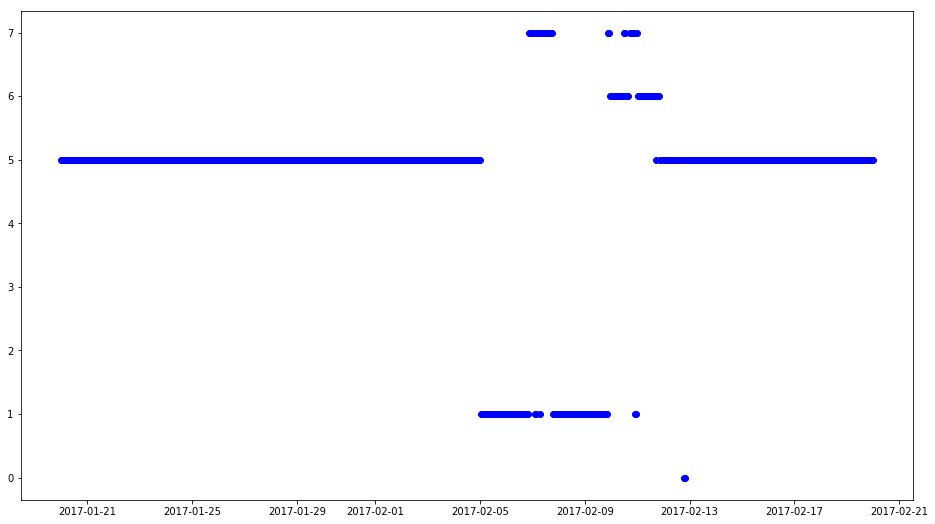

In [5]:
plt.figure(figsize = (16,9))
plt.plot(ERA5_RR1h_LFH.ptype['2017-01-20 00:00:00':'2017-02-20 00:00:00'],'bo')

plt.savefig('./figures/ptype.png')
plt.savefig('./figures/ptype.eps')


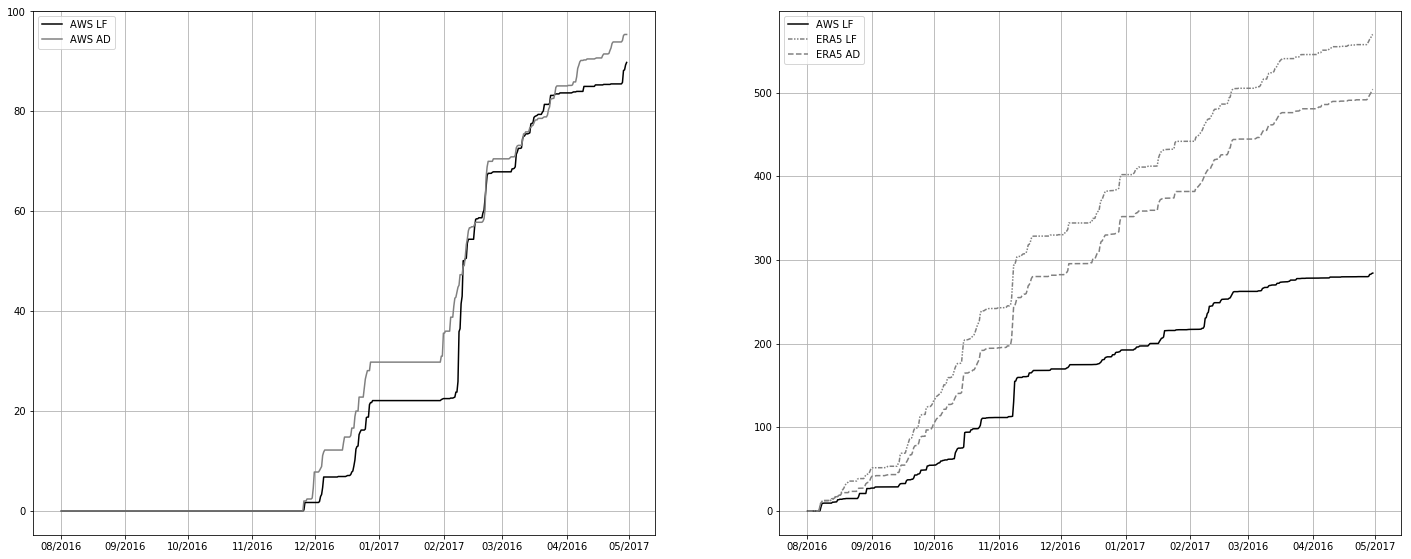

In [25]:
file_name = "RR_accumulated"

ek_LFH = pd.read_csv('data/LFH_RR_ts.txt', na_values = 'NaN')
ek_LFH.DateTime = pd.to_datetime(ek_LFH.DateTime)
ek_LFH.set_index('DateTime',inplace=True)

ek_AVD = pd.read_csv('data/AVD_RR_ts.txt', na_values = 'NaN')
ek_AVD.DateTime = pd.to_datetime(ek_AVD.DateTime)
ek_AVD.set_index('DateTime',inplace=True)

ERA5_RR1h_LFH = pd.read_csv('data/ERA5_GF.txt', na_values = 'NaN')
ERA5_RR1h_LFH['DateTime'] = pd.to_datetime(ERA5_RR1h_LFH['DateTime'])
ERA5_RR1h_LFH.set_index('DateTime',inplace=True)

ERA5_RR1h_AVD = pd.read_csv('data/ERA5_AVD.txt', na_values = 'NaN')
ERA5_RR1h_AVD['DateTime'] = pd.to_datetime(ERA5_RR1h_AVD['DateTime'])
ERA5_RR1h_AVD.set_index('DateTime',inplace=True)


ERA5_RR12h_LFH = ERA5_RR1h_LFH.RRmm.resample('12H', base = 6).sum()
ERA5_RR12h_LFH = ERA5_RR12h_LFH['2016-08-01 00:00:00':'2017-04-30 0:00:00']
ERA5_RR12h_AVD = ERA5_RR1h_AVD.RRmm.resample('12H', base = 6).sum()
ERA5_RR12h_AVD = ERA5_RR12h_AVD['2016-08-01 00:00:00':'2017-04-30 00:00:00']
ek_LFH = ek_LFH['2016-08-01 00:00:00':'2017-04-30 00:00:00']

precip = pd.DataFrame()
precip['ERA5_12H_LFH'] = ERA5_RR12h_LFH
precip['ERA5_12H_AVD'] = ERA5_RR12h_AVD
precip['ek_LFH'] = ek_LFH.RR
precip['ek_AVD'] = ek_AVD.RR

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
fig.subplots_adjust(left=.03, bottom=.05, right=.98, top=.96)

ns_ek_LFH = precip['ek_LFH'].tolist()
ns_sum_ekLFH = [np.nansum(ns_ek_LFH[0:i]) for i in range(len(ns_ek_LFH))]
ns_ERA5_LFH = precip['ERA5_12H_LFH'].tolist()
ns_sum_ERALFH = [np.nansum(ns_ERA5_LFH[0:i]) for i in range(len(ns_ERA5_LFH))]
ns_ERA5_AVD = precip['ERA5_12H_AVD'].tolist()
ns_sum_ERA5AVD = [np.nansum(ns_ERA5_AVD[0:i]) for i in range(len(ns_ERA5_AVD))]
linestyle = (0, (3, 1, 1, 1, 1, 1))
ax2.plot(precip.index, ns_sum_ekLFH,label = 'AWS LF', linestyle = '-', color = 'black')
ax2.plot(precip.index, ns_sum_ERALFH,label = 'ERA5 LF', linestyle = linestyle, color = 'grey')
ax2.plot(precip.index, ns_sum_ERA5AVD,label = 'ERA5 AD', linestyle = '--', color = 'grey')
ax2.legend()
ax2.grid(which='major')
xtick_label = ['08/2016','09/2016','10/2016','11/2016','12/2016','01/2017','02/2017','03/2016','04/2016','05/2017']
ax2.set_xticklabels(xtick_label)

ek_LFH = ek_LFH['2016-11-22 00:00:00':'2017-04-30 00:00:00']
ek_AVD = ek_AVD['2016-11-22 00:00:00':'2017-04-30 00:00:00']
ek_LFH['RR']['2016-12-28 18:00:00':'2017-01-28 18:00:00'] = np.nan
precip['ek_AVD'] = ek_AVD.RR
precip['ek_LFH'] = ek_LFH.RR
ns_ek_LFH = precip['ek_LFH'].tolist()
ns_sum_ekLFH = [np.nansum(ns_ek_LFH[0:i]) for i in range(len(ns_ek_LFH))]
ns_ek_AVD = precip['ek_AVD'].tolist()
ns_sum_ekAVD = [np.nansum(ns_ek_AVD[0:i]) for i in range(len(ns_ek_AVD))]
ax1.plot(precip.index, ns_sum_ekLFH,label = 'AWS LF', linestyle = '-', color = 'black')
ax1.plot(precip.index, ns_sum_ekAVD,label = 'AWS AD', linestyle = '-', color = 'grey')
ax1.grid(b = True, which='both', axis='both')
ax1.set_xticklabels(xtick_label)
ax1.legend()

fig.savefig("figures/%s.eps" % file_name)
fig.savefig("figures/%s.png" % file_name, dpi=200)



